# TSNE Visualization Xeno Canto

In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


from PIL import Image


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


from bring_features_and_file_paths import bring_features_and_file_paths
from bring_features_and_file_paths import get_BirdNET_detections
import matplotlib.cm as cm

In [2]:
features, file_paths, indices = bring_features_and_file_paths('/grand/projects/BirdAudio/Soundscapes/Xeno_Canto_Features/', sub_sample=0.999)

We have 9753 feature vectors.


In [3]:
features.shape

torch.Size([9753, 384])

In [4]:
pca = PCA(n_components=50, svd_solver='full')
pca.fit(features)
pca_features = pca.transform(features)
pca_features.shape

(9753, 50)

In [5]:
dpath='/grand/projects/BirdAudio/Soundscapes/TSNE_Data'
fname='f_embedded.npy'
if not os.path.isfile(os.path.join(dpath, fname)):
    f_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=10).fit_transform(pca_features)
    #f_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=50).fit_transform(pca_features)
    f_embedded.shape
    np.save(os.path.join(dpath, fname), f_embedded)
else:
    f_embedded = np.load(os.path.join(dpath, fname))

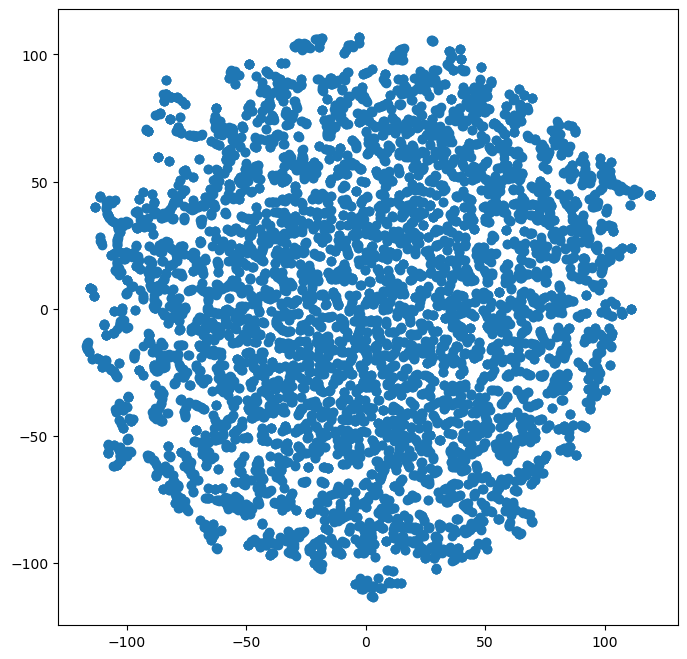

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(f_embedded[:,0],f_embedded[:,1])

In [7]:
labels = DBSCAN(eps=3.50, min_samples=10).fit_predict(f_embedded)
#labels = DBSCAN(eps=3.5, min_samples=170).fit_predict(f_embedded)
#labels = DBSCAN(eps=1.5, min_samples=55).fit_predict(f_embedded)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[labels != -1] = True
n_noise_points = list(labels).count(-1)
#set(label_predictions)

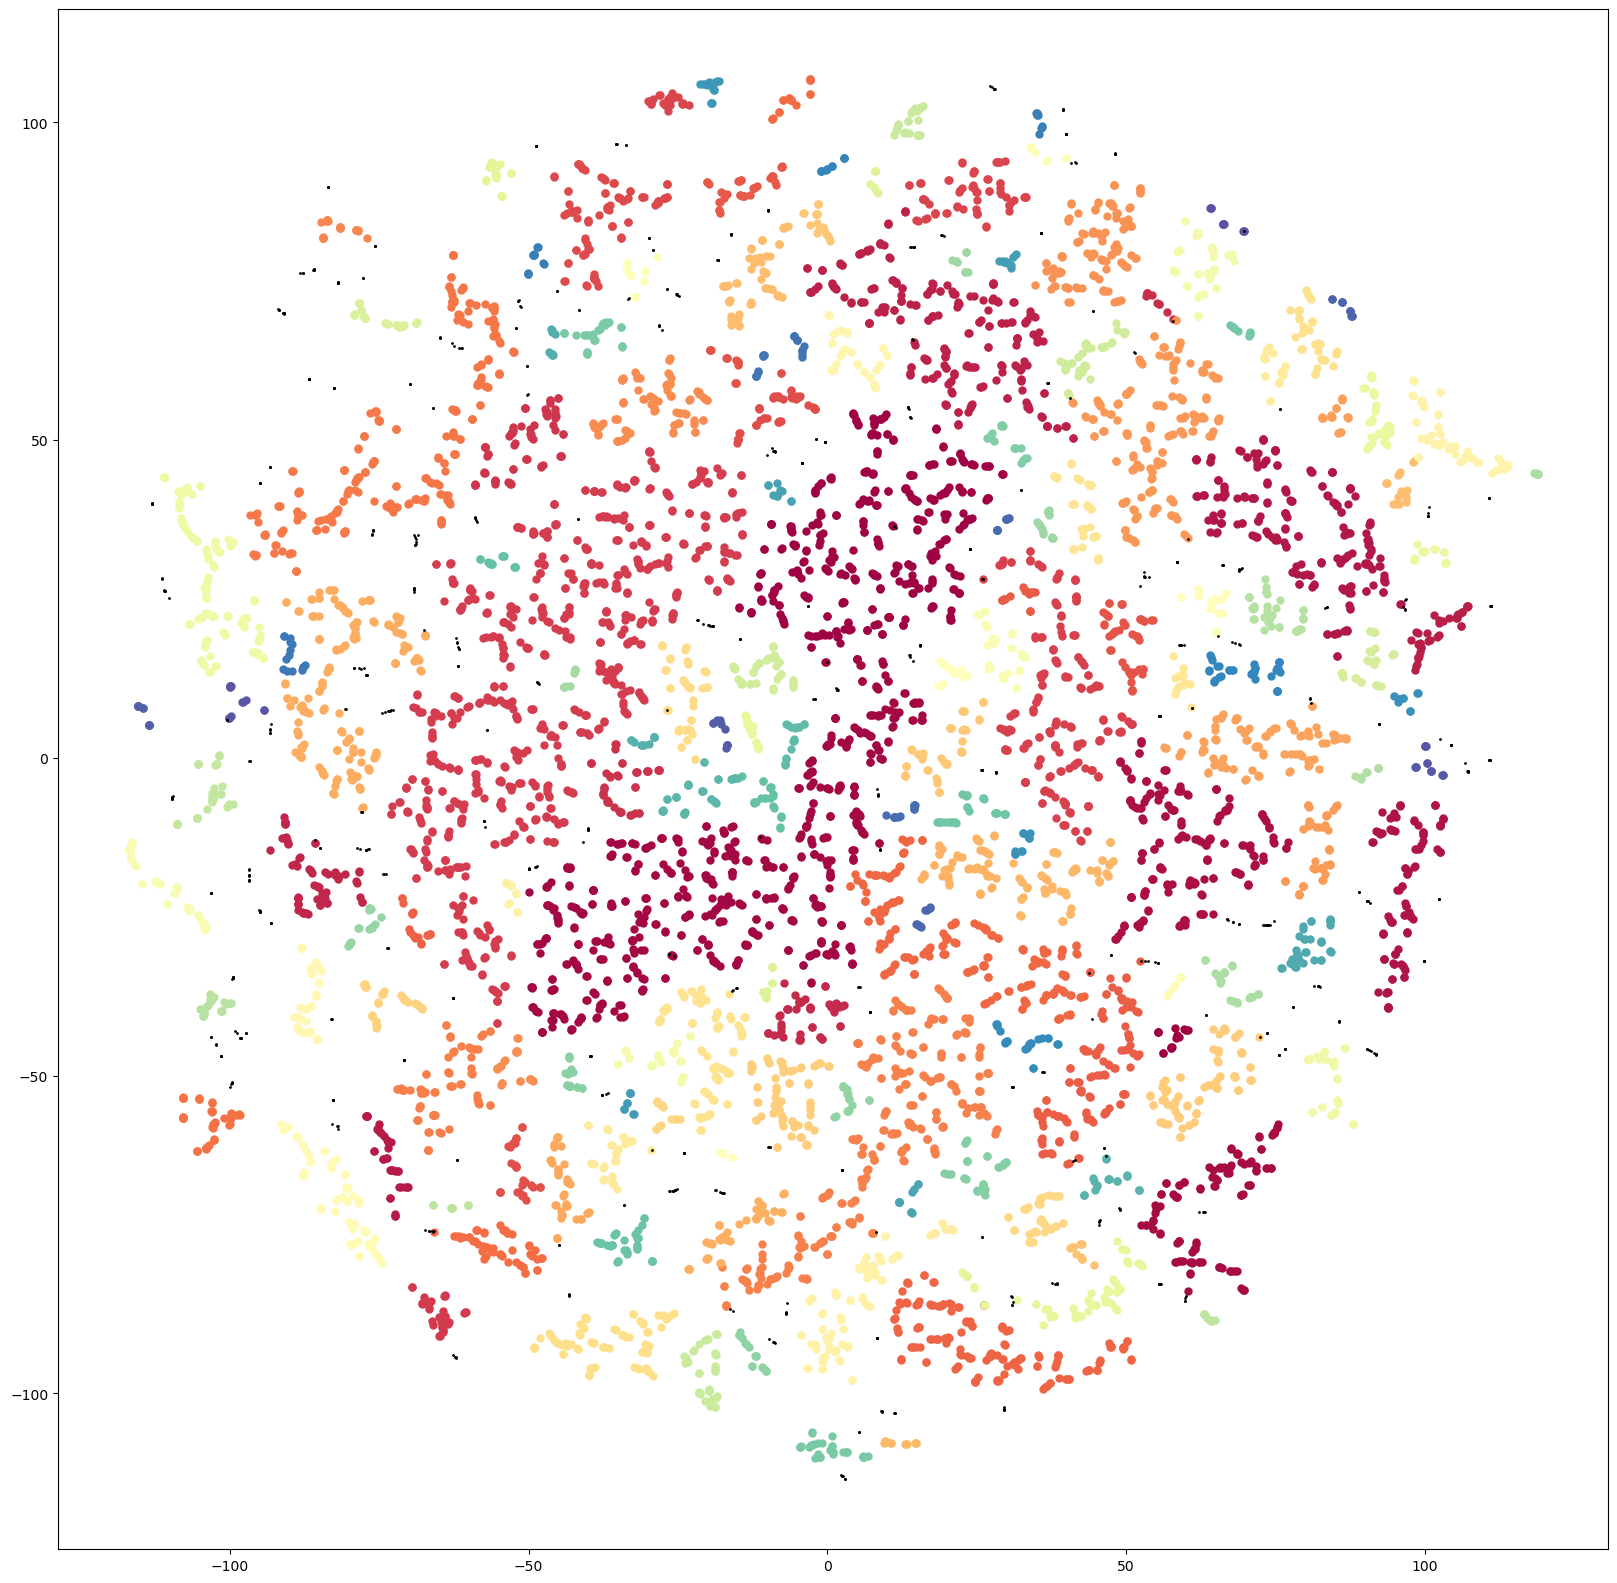

In [8]:
# Black removed and is used for noise instead.
print_outliers=True
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    #class_member_mask = labels == k
    xy = f_embedded[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        #markeredgecolor="k",
        markeredgecolor=col,
        markersize=5,
    )

    if print_outliers:
        xy = f_embedded[class_member_mask & ~core_samples_mask]
        ax.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=1,
        )

fig.set_size_inches(20, 20)

In [9]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_points_ = labels.shape[0]


print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Estimated number of labeled points: %d" % n_points_)
print(int(100*n_noise_/n_points_), "% of points in the data is noise")

Estimated number of clusters: 158
Estimated number of noise points: 775
Estimated number of labeled points: 9753
7 % of points in the data is noise


In [10]:
features=f_embedded
labels=labels

In [11]:
image_paths=[]
features=[]
LABELS=[]
for fpath, feat, label in zip(file_paths,f_embedded,labels):
    if label != -1:
        file_path = ''.join([chr(int(x)) for x in fpath]).replace('~','')
        image_paths.append(file_path)
        features.append(feat)
        LABELS.append(label)
        print(file_path)

image_paths=np.array(image_paths)
features=np.array(features)
labels=np.array(LABELS)

Spectrogram_Images/morton_dataset/Vireo olivaceus_Red-eyed Vireo/XC190135_2.png
Spectrogram_Images/woodpecker_dataset/Dryocopus martius_Black Woodpecker/XC293003_0.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC428329_3.png
Spectrogram_Images/morton_dataset/Vireo gilvus_Warbling Vireo/XC13620_1.png
Spectrogram_Images/woodpecker_dataset/Dryobates minor_Lesser Spotted Woodpecker/XC702148_0.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC769825_2.png
Spectrogram_Images/morton_dataset/Poecile atricapillus_Black-capped Chickadee/XC76507_1.png
Spectrogram_Images/morton_dataset/Cardinalis cardinalis_Northern Cardinal/XC235432_1.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC313352_0.png
Spectrogram_Images/woodpecker_dataset/Dryocopus martius_Black Woodpecker/XC697938_1.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC701469_1.png
Spectrogram_Images/morton_dataset/Spi

Spectrogram_Images/morton_dataset/Leiothlypis peregrina_Tennessee Warbler/XC600064_2.png
Spectrogram_Images/woodpecker_dataset/Dryocopus martius_Black Woodpecker/XC780067_3.png
Spectrogram_Images/morton_dataset/Vireo gilvus_Warbling Vireo/XC325655_3.png
Spectrogram_Images/morton_dataset/Vireo gilvus_Warbling Vireo/XC377368_1.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC298853_5.png
Spectrogram_Images/morton_dataset/Dumetella carolinensis_Grey Catbird/XC469593_4.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC701237_0.png
Spectrogram_Images/morton_dataset/Agelaius phoeniceus_Red-winged Blackbird/XC636452_4.png
Spectrogram_Images/morton_dataset/Polioptila caerulea_Blue-grey Gnatcatcher/XC77905_2.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC349397_1.png
Spectrogram_Images/morton_dataset/Vireo olivaceus_Red-eyed Vireo/XC733482_0.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos leuc

Spectrogram_Images/morton_dataset/Geothlypis trichas_Common Yellowthroat/XC76705_3.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC658907_0.png
Spectrogram_Images/woodpecker_dataset/Dryobates minor_Lesser Spotted Woodpecker/XC631521_0.png
Spectrogram_Images/morton_dataset/Agelaius phoeniceus_Red-winged Blackbird/XC452063_0.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC590604_0.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC415109_3.png
Spectrogram_Images/morton_dataset/Hylocichla mustelina_Wood Thrush/XC562218_0.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC618134_0.png
Spectrogram_Images/morton_dataset/Zenaida macroura_Mourning Dove/XC153648_1.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC138337_2.png
Spectrogram_Images/morton_dataset/Poecile atricapillus_Black-capped Chickadee/XC720923_1.png
Spectrogram_Images/woodpecker_dataset/Picus canus_Grey-headed

Spectrogram_Images/woodpecker_dataset/Dryocopus martius_Black Woodpecker/XC624333_0.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC351152_4.png
Spectrogram_Images/woodpecker_dataset/Picoides tridactylus_Eurasian Three-toed Woodpecker/XC110376_0.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC623469_1.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC555062_3.png
Spectrogram_Images/morton_dataset/Vireo gilvus_Warbling Vireo/XC557424_0.png
Spectrogram_Images/morton_dataset/Vireo gilvus_Warbling Vireo/XC600073_2.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC324456_4.png
Spectrogram_Images/morton_dataset/Cardinalis cardinalis_Northern Cardinal/XC170397_0.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC295148_5.png
Spectrogram_Images/morton_dataset/Cardinalis cardinalis_Northern Cardinal/XC511119_3.png
Spectrogram_Images/morton_dataset/Sialia sialis_Eastern Bluebird/

Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC559918_0.png
Spectrogram_Images/morton_dataset/Sitta canadensis_Red-breasted Nuthatch/XC479768_0.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC322620_0.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC135619_1.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC382858_1.png
Spectrogram_Images/morton_dataset/Vireo gilvus_Warbling Vireo/XC216811_1.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC528666_3.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC494253_4.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC483628_0.png
Spectrogram_Images/morton_dataset/Geothlypis trichas_Common Yellowthroat/XC483544_0.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC539569_0.png
Spectrogram_Images/morton_dataset/Vireo gilvus_Warbling Vireo/XC320205_0.png
Spe

Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC663787_1.png
Spectrogram_Images/morton_dataset/Cardinalis cardinalis_Northern Cardinal/XC505872_3.png
Spectrogram_Images/morton_dataset/Pipilo erythrophthalmus_Eastern Towhee/XC375280_4.png
Spectrogram_Images/morton_dataset/Spizella pusilla_Field Sparrow/XC323530_1.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC367008_1.png
Spectrogram_Images/morton_dataset/Spinus tristis_American Goldfinch/XC255471_0.png
Spectrogram_Images/morton_dataset/Vireo flavifrons_Yellow-throated Vireo/XC317172_2.png
Spectrogram_Images/morton_dataset/Dumetella carolinensis_Grey Catbird/XC370247_4.png
Spectrogram_Images/morton_dataset/Agelaius phoeniceus_Red-winged Blackbird/XC103205_4.png
Spectrogram_Images/morton_dataset/Vireo olivaceus_Red-eyed Vireo/XC658012_2.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC312021_3.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC742848

Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC408126_3.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC269172_1.png
Spectrogram_Images/morton_dataset/Tringa solitaria_Solitary Sandpiper/XC782072_1.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC728358_0.png
Spectrogram_Images/morton_dataset/Spinus tristis_American Goldfinch/XC313678_3.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC707949_0.png
Spectrogram_Images/morton_dataset/Geothlypis trichas_Common Yellowthroat/XC107470_0.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC663733_0.png
Spectrogram_Images/woodpecker_dataset/Dryobates minor_Lesser Spotted Woodpecker/XC357372_1.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC121701_1.png
Spectrogram_Images/morton_dataset/Agelaius phoeniceus_Red-winged Blackbird/XC571325_0.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC649134_1.

Spectrogram_Images/morton_dataset/Spizella pusilla_Field Sparrow/XC317295_2.png
Spectrogram_Images/morton_dataset/Contopus virens_Eastern Wood Pewee/XC384635_0.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC308983_2.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC196276_1.png
Spectrogram_Images/morton_dataset/Agelaius phoeniceus_Red-winged Blackbird/XC321249_1.png
Spectrogram_Images/morton_dataset/Geothlypis trichas_Common Yellowthroat/XC416810_2.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC349397_2.png
Spectrogram_Images/morton_dataset/Molothrus ater_Brown-headed Cowbird/XC563104_2.png
Spectrogram_Images/morton_dataset/Hylocichla mustelina_Wood Thrush/XC141671_0.png
Spectrogram_Images/morton_dataset/Colaptes auratus_Northern Flicker/XC362027_2.png
Spectrogram_Images/morton_dataset/Leuconotopicus villosus_Hairy Woodpecker/XC325121_0.png
Spectrogram_Images/morton_dataset/Troglodytes ae

Spectrogram_Images/morton_dataset/Poecile atricapillus_Black-capped Chickadee/XC139603_0.png
Spectrogram_Images/morton_dataset/Hylocichla mustelina_Wood Thrush/XC416792_1.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC163774_0.png
Spectrogram_Images/morton_dataset/Sitta carolinensis_White-breasted Nuthatch/XC363148_0.png
Spectrogram_Images/morton_dataset/Icterus galbula_Baltimore Oriole/XC324865_5.png
Spectrogram_Images/morton_dataset/Podilymbus podiceps_Pied-billed Grebe/XC624578_2.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC649580_1.png
Spectrogram_Images/morton_dataset/Agelaius phoeniceus_Red-winged Blackbird/XC177303_1.png
Spectrogram_Images/morton_dataset/Cardinalis cardinalis_Northern Cardinal/XC618942_1.png
Spectrogram_Images/morton_dataset/Megaceryle alcyon_Belted Kingfisher/XC503144_2.png
Spectrogram_Images/morton_dataset/Vireo gilvus_Warbling Vireo/XC103063_1.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren

Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC527766_2.png
Spectrogram_Images/morton_dataset/Hylocichla mustelina_Wood Thrush/XC579074_2.png
Spectrogram_Images/morton_dataset/Myiarchus crinitus_Great Crested Flycatcher/XC331330_0.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC83263_0.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC116986_0.png
Spectrogram_Images/morton_dataset/Hylocichla mustelina_Wood Thrush/XC139062_3.png
Spectrogram_Images/morton_dataset/Vireo gilvus_Warbling Vireo/XC232124_1.png
Spectrogram_Images/morton_dataset/Spizella pusilla_Field Sparrow/XC229855_0.png
Spectrogram_Images/morton_dataset/Sitta canadensis_Red-breasted Nuthatch/XC753117_5.png
Spectrogram_Images/morton_dataset/Pheucticus ludovicianus_Rose-breasted Grosbeak/XC562967_2.png
Spectrogram_Images/morton_dataset/Seiurus aurocapilla_Ovenbird/XC317995_2.png
Spectrogram_Images/morton_dataset/Spizella pusilla_Fiel

Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC138237_3.png
Spectrogram_Images/morton_dataset/Vireo flavifrons_Yellow-throated Vireo/XC645966_1.png
Spectrogram_Images/morton_dataset/Myiarchus crinitus_Great Crested Flycatcher/XC135607_1.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC699868_4.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC576243_0.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC712585_4.png
Spectrogram_Images/morton_dataset/Vireo flavifrons_Yellow-throated Vireo/XC385850_3.png
Spectrogram_Images/morton_dataset/Pipilo erythrophthalmus_Eastern Towhee/XC486975_1.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC641144_4.png
Spectrogram_Images/morton_dataset/Leiothlypis peregrina_Tennessee Warbler/XC181174_1.png
Spectrogram_Images/morton_dataset/Poecile atricapillus_Black-capped Chickadee/XC589365_3.png
Spectrogra

Spectrogram_Images/morton_dataset/Agelaius phoeniceus_Red-winged Blackbird/XC571319_0.png
Spectrogram_Images/morton_dataset/Agelaius phoeniceus_Red-winged Blackbird/XC255722_1.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC355001_2.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC408127_5.png
Spectrogram_Images/morton_dataset/Poecile atricapillus_Black-capped Chickadee/XC305762_1.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC568588_2.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC655760_1.png
Spectrogram_Images/morton_dataset/Vireo gilvus_Warbling Vireo/XC423318_0.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC86324_1.png
Spectrogram_Images/morton_dataset/Cardinalis cardinalis_Northern Cardinal/XC563620_0.png
Spectrogram_Images/morton_dataset/Geothlypis trichas_Common Yellowthroat/XC172967_2.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC16016

Spectrogram_Images/morton_dataset/Hylocichla mustelina_Wood Thrush/XC420260_5.png
Spectrogram_Images/morton_dataset/Spizella pusilla_Field Sparrow/XC101447_3.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC102396_4.png
Spectrogram_Images/morton_dataset/Vireo flavifrons_Yellow-throated Vireo/XC670953_0.png
Spectrogram_Images/woodpecker_dataset/Dryobates minor_Lesser Spotted Woodpecker/XC364346_1.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC76992_2.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC699207_5.png
Spectrogram_Images/morton_dataset/Seiurus aurocapilla_Ovenbird/XC229637_3.png
Spectrogram_Images/morton_dataset/Geothlypis trichas_Common Yellowthroat/XC429261_1.png
Spectrogram_Images/morton_dataset/Polioptila caerulea_Blue-grey Gnatcatcher/XC21470_1.png
Spectrogram_Images/morton_dataset/Geothlypis trichas_Common Yellowthroat/XC131472_2.png
Spectrogram_Images/morton_dataset/Troglody

Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC164211_4.png
Spectrogram_Images/woodpecker_dataset/Dryobates minor_Lesser Spotted Woodpecker/XC546834_3.png
Spectrogram_Images/morton_dataset/Sialia sialis_Eastern Bluebird/XC217747_0.png
Spectrogram_Images/morton_dataset/Tachycineta bicolor_Tree Swallow/XC65819_1.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC630963_3.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC757369_1.png
Spectrogram_Images/morton_dataset/Pipilo erythrophthalmus_Eastern Towhee/XC318896_1.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC483628_2.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC428329_1.png
Spectrogram_Images/morton_dataset/Dumetella carolinensis_Grey Catbird/XC665657_1.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC648387_0.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC481115_3.

Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC22032_3.png
Spectrogram_Images/morton_dataset/Contopus virens_Eastern Wood Pewee/XC563453_2.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC353500_3.png
Spectrogram_Images/morton_dataset/Agelaius phoeniceus_Red-winged Blackbird/XC315596_0.png
Spectrogram_Images/morton_dataset/Geothlypis trichas_Common Yellowthroat/XC321071_2.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC82440_0.png
Spectrogram_Images/morton_dataset/Cardinalis cardinalis_Northern Cardinal/XC579903_5.png
Spectrogram_Images/morton_dataset/Piranga olivacea_Scarlet Tanager/XC561387_3.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC101498_0.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC705269_1.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC483498_1.png
Spectrogram_Images/morton_dataset/Spinus tristis_Americ

Spectrogram_Images/morton_dataset/Hirundo rustica_Barn Swallow/XC337978_2.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos leucotos_White-backed Woodpecker/XC422054_2.png
Spectrogram_Images/morton_dataset/Leiothlypis peregrina_Tennessee Warbler/XC335875_0.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC212862_3.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC424026_0.png
Spectrogram_Images/morton_dataset/Spinus tristis_American Goldfinch/XC186456_3.png
Spectrogram_Images/woodpecker_dataset/Dryobates minor_Lesser Spotted Woodpecker/XC448179_2.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC274509_1.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC279059_0.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC320906_0.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC295148_2.png
Spectrogram_Images/morton_dataset/Vireo olivaceu

Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC311716_1.png
Spectrogram_Images/morton_dataset/Tachycineta bicolor_Tree Swallow/XC446453_0.png
Spectrogram_Images/morton_dataset/Hylocichla mustelina_Wood Thrush/XC33467_5.png
Spectrogram_Images/woodpecker_dataset/Dendrocopos major_Great Spotted Woodpecker/XC644314_0.png
Spectrogram_Images/morton_dataset/Contopus virens_Eastern Wood Pewee/XC474012_0.png
Spectrogram_Images/morton_dataset/Setophaga striata_Blackpoll Warbler/XC172956_4.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC158992_5.png
Spectrogram_Images/morton_dataset/Pheucticus ludovicianus_Rose-breasted Grosbeak/XC133913_3.png
Spectrogram_Images/morton_dataset/Melospiza melodia_Song Sparrow/XC562168_1.png
Spectrogram_Images/morton_dataset/Geothlypis trichas_Common Yellowthroat/XC375271_0.png
Spectrogram_Images/morton_dataset/Turdus migratorius_American Robin/XC324394_0.png
Spectrogram_Images/morton_dataset/Troglodytes aedon_House Wren/XC

In [12]:
# Generate dataframe
df = pd.DataFrame(
   dict(
      x=features[:,0],
      y=features[:,1],
      paths=image_paths,
      labels=labels
   )
)
df

,x,y,paths,labels
0,55.277367,-43.092117,Spectrogram_Images/morton_dataset/Vireo olivac...,0
1,21.170990,28.876804,Spectrogram_Images/woodpecker_dataset/Dryocopu...,1
2,-62.589428,79.106964,Spectrogram_Images/morton_dataset/Melospiza me...,34
3,-3.626113,-10.874754,Spectrogram_Images/morton_dataset/Vireo gilvus...,2
4,73.904282,64.712952,Spectrogram_Images/woodpecker_dataset/Dryobate...,69
...,...,...,...,...
8973,-17.510485,-25.640804,Spectrogram_Images/morton_dataset/Cardinalis c...,2
8974,84.489922,53.650597,Spectrogram_Images/morton_dataset/Cardinalis c...,44
8975,-84.581940,11.320912,Spectrogram_Images/woodpecker_dataset/Dendroco...,47
8976,-24.233438,-50.203979,Spectrogram_Images/morton_dataset/Melospiza me...,87


In [13]:
df.to_csv(os.path.join(dpath, 'TSNE.csv'))

In [14]:
np.where(labels==-1)

(array([], dtype=int64),)

In [15]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = metrics.silhouette_score(df.loc[:, df.columns!='paths'], df['labels'])
print(
    "For n_clusters =",
    n_clusters_,
    "The average silhouette_score is :",
    silhouette_avg,
)

For n_clusters = 158 The average silhouette_score is : 0.4539196781165961


In [16]:
Spectrograms_BASE_PATH = '/grand/projects/BirdAudio/Soundscapes/Xeno_Canto_Spectrograms/'
data = []
for row in df.iterrows():
    element = {}
    element['x']=row[1]['x']
    element['y']=row[1]['y']
    element['paths']=row[1]['paths']
    element['labels']=row[1]['labels']
    element['dataset']=row[1]['paths'].split('/')[1]
    element['bird_class']=row[1]['paths'].split('/')[2]
    data.append(element)
    
data = pd.DataFrame(data=data)
data

,x,y,paths,labels,dataset,bird_class
0,55.277367,-43.092117,Spectrogram_Images/morton_dataset/Vireo olivac...,0,morton_dataset,Vireo olivaceus_Red-eyed Vireo
1,21.170990,28.876804,Spectrogram_Images/woodpecker_dataset/Dryocopu...,1,woodpecker_dataset,Dryocopus martius_Black Woodpecker
2,-62.589428,79.106964,Spectrogram_Images/morton_dataset/Melospiza me...,34,morton_dataset,Melospiza melodia_Song Sparrow
3,-3.626113,-10.874754,Spectrogram_Images/morton_dataset/Vireo gilvus...,2,morton_dataset,Vireo gilvus_Warbling Vireo
4,73.904282,64.712952,Spectrogram_Images/woodpecker_dataset/Dryobate...,69,woodpecker_dataset,Dryobates minor_Lesser Spotted Woodpecker
...,...,...,...,...,...,...
8973,-17.510485,-25.640804,Spectrogram_Images/morton_dataset/Cardinalis c...,2,morton_dataset,Cardinalis cardinalis_Northern Cardinal
8974,84.489922,53.650597,Spectrogram_Images/morton_dataset/Cardinalis c...,44,morton_dataset,Cardinalis cardinalis_Northern Cardinal
8975,-84.581940,11.320912,Spectrogram_Images/woodpecker_dataset/Dendroco...,47,woodpecker_dataset,Dendrocopos major_Great Spotted Woodpecker
8976,-24.233438,-50.203979,Spectrogram_Images/morton_dataset/Melospiza me...,87,morton_dataset,Melospiza melodia_Song Sparrow


In [17]:
# data=data[data['dataset']!='woodpecker_dataset']
# data

In [18]:
unique_bird_labels = np.unique(data['bird_class'])
unique_dataset_labels = np.unique(data['dataset'])

Spectrograms_BASE_PATH = '/grand/projects/BirdAudio/Soundscapes/Xeno_Canto_Spectrograms/'
data1 = []
for row in data.iterrows():
    bird_label = np.where(unique_bird_labels == row[1]['bird_class'])[0].item()
    dataset_label = np.where(unique_dataset_labels == row[1]['dataset'])[0].item()
    element = {}
    element['x']=row[1]['x']
    element['y']=row[1]['y']
    element['paths']=row[1]['paths']
    element['labels']=row[1]['labels']
    element['dataset']=row[1]['dataset']
    element['bird_class']=row[1]['bird_class']
    element['bird_label']=bird_label
    element['dataset_label']=dataset_label
    data1.append(element)
    
data1 = pd.DataFrame(data=data1)
data1

,x,y,paths,labels,dataset,bird_class,bird_label,dataset_label
0,55.277367,-43.092117,Spectrogram_Images/morton_dataset/Vireo olivac...,0,morton_dataset,Vireo olivaceus_Red-eyed Vireo,54,0
1,21.170990,28.876804,Spectrogram_Images/woodpecker_dataset/Dryocopu...,1,woodpecker_dataset,Dryocopus martius_Black Woodpecker,14,1
2,-62.589428,79.106964,Spectrogram_Images/morton_dataset/Melospiza me...,34,morton_dataset,Melospiza melodia_Song Sparrow,25,0
3,-3.626113,-10.874754,Spectrogram_Images/morton_dataset/Vireo gilvus...,2,morton_dataset,Vireo gilvus_Warbling Vireo,53,0
4,73.904282,64.712952,Spectrogram_Images/woodpecker_dataset/Dryobate...,69,woodpecker_dataset,Dryobates minor_Lesser Spotted Woodpecker,12,1
...,...,...,...,...,...,...,...,...
8973,-17.510485,-25.640804,Spectrogram_Images/morton_dataset/Cardinalis c...,2,morton_dataset,Cardinalis cardinalis_Northern Cardinal,2,0
8974,84.489922,53.650597,Spectrogram_Images/morton_dataset/Cardinalis c...,44,morton_dataset,Cardinalis cardinalis_Northern Cardinal,2,0
8975,-84.581940,11.320912,Spectrogram_Images/woodpecker_dataset/Dendroco...,47,woodpecker_dataset,Dendrocopos major_Great Spotted Woodpecker,9,1
8976,-24.233438,-50.203979,Spectrogram_Images/morton_dataset/Melospiza me...,87,morton_dataset,Melospiza melodia_Song Sparrow,25,0


In [19]:
data1.to_csv(os.path.join(dpath, 'Data.csv'))

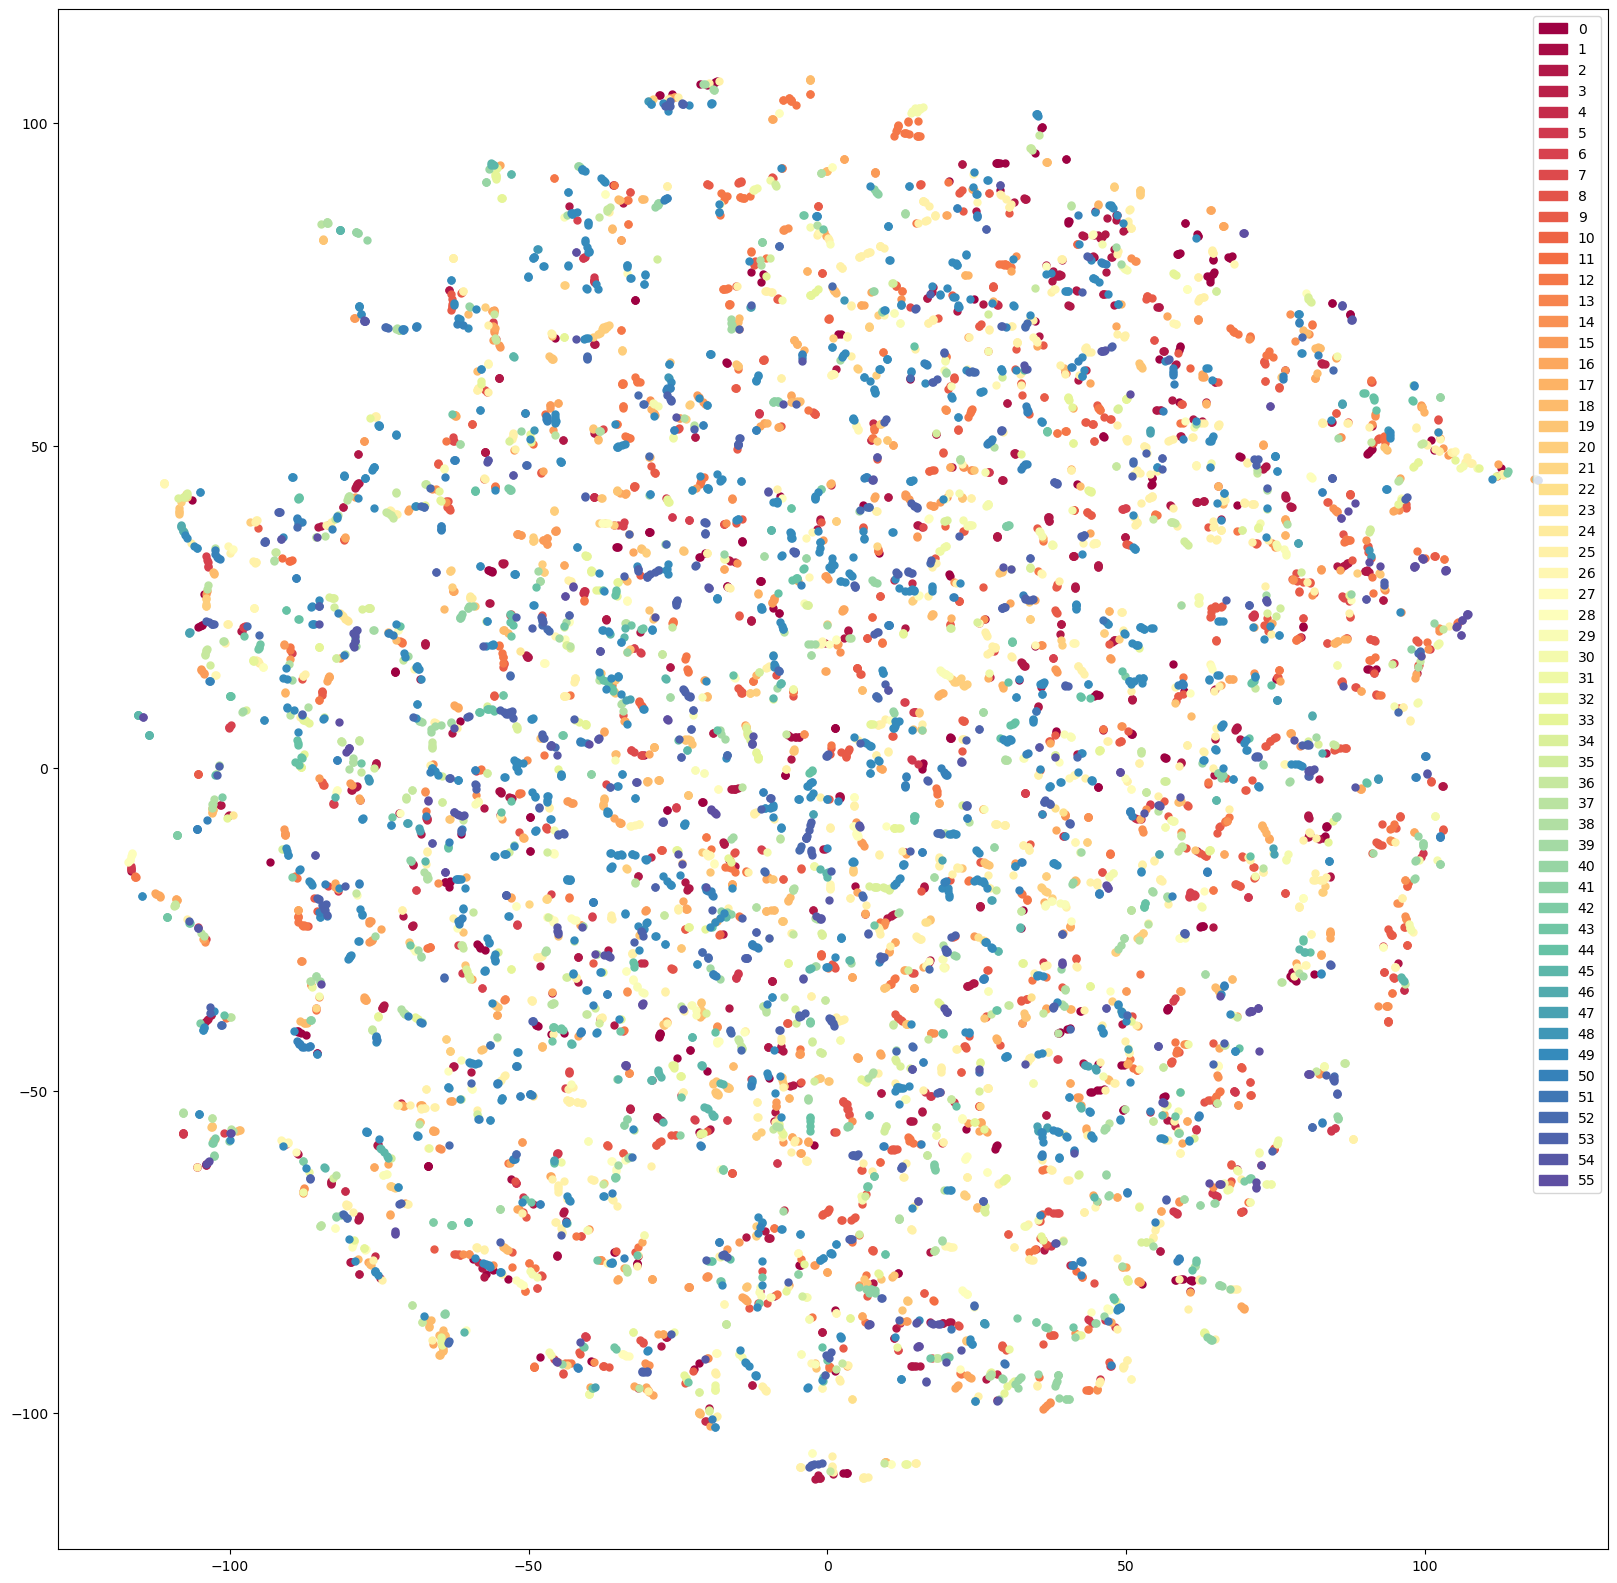

In [20]:
# Black removed and is used for noise instead.
column = 'bird_label'
labels = data1[column]
f_embedded = np.transpose(np.array([data1['x'], data1['y']]))
unique_labels = set(data1[column])
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[labels != -1] = True
n_noise_points = list(labels).count(-1)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
patches=[]
for k, col in zip(unique_labels, colors):
    #print('Color ', col)
    #print('Label ', k)

    class_member_mask = labels == k
    xy = f_embedded[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col,
        markersize=5,
    )

    patch = mpatches.Patch(color=col, label=k)
    patches.append(patch)

ax.legend(handles=patches)

fig.set_size_inches(20, 20)

In [21]:
aux=data1.loc[:, data1.columns!='paths']
aux=aux.loc[:, aux.columns!='dataset']
aux=aux.loc[:, aux.columns!='bird_class']
metrics.silhouette_score(aux, aux[column])

-0.32381407159942777

In [22]:
n_clusters = len(unique_bird_labels)
silhouette_avg = silhouette_score(aux, aux[column])
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(aux, aux[column])


For n_clusters = 56 The average silhouette_score is : -0.32381407159942777


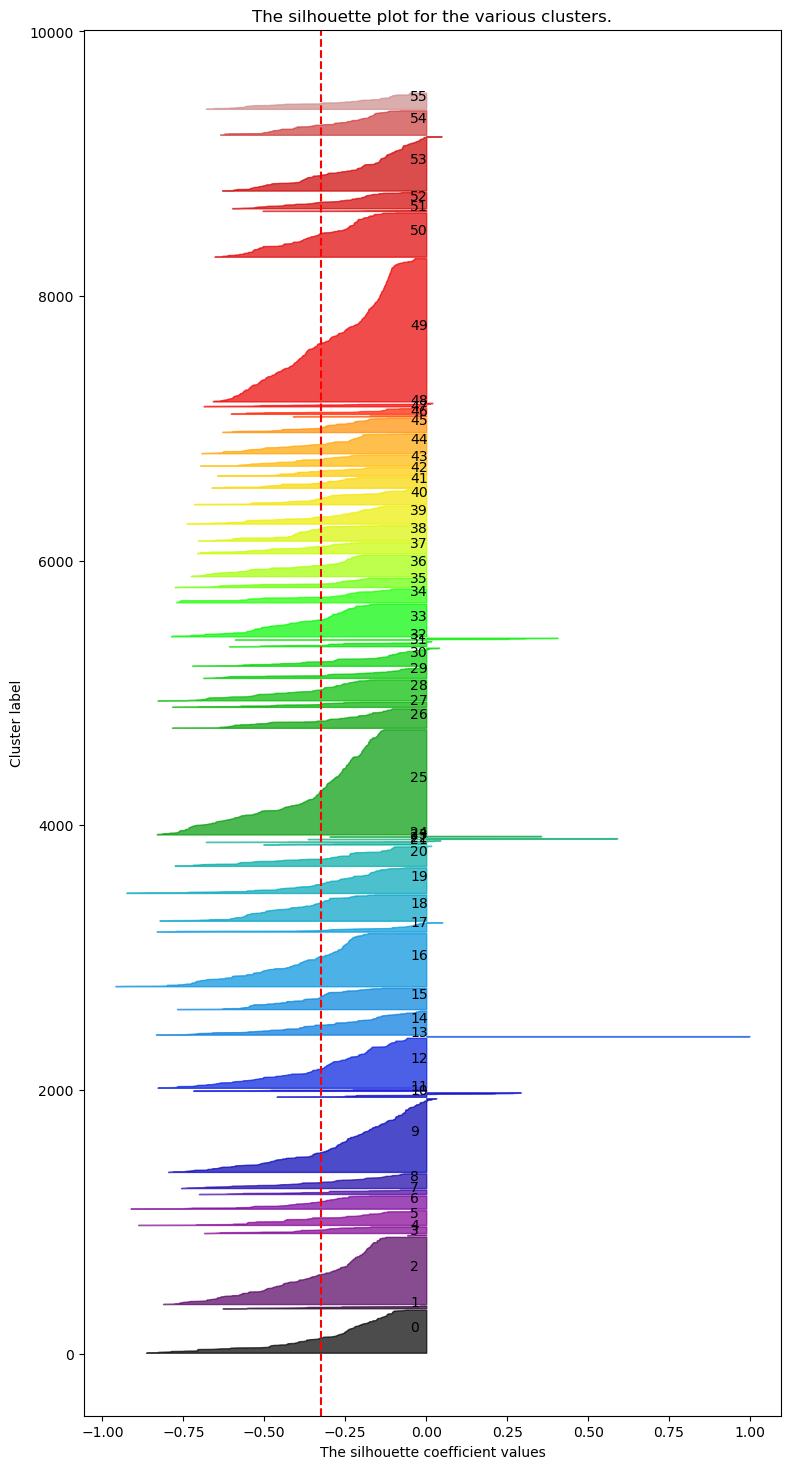

In [23]:
y_lower = 10
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(9, 18)
for i in unique_labels:
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[aux[column] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
